方針\
$X$エラーについては、$p=[5\times10^{-2},10^{-1}]$を補完して、$p=10^{-4},5\times10^{-4}$を求める。
その後、符合距離の関数として求め直す。
$Z$エラーについては、$p=10^{-4},5\times10^{-4}$から、符合距離の関数として求め直す。

# d1=3

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.ticker as ptick

## Xエラー

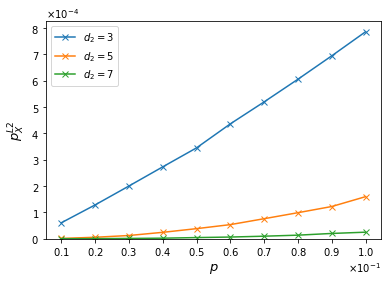

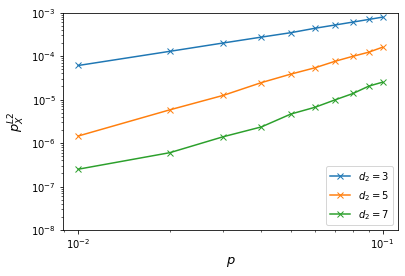

In [137]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=3,eta=1000"
# ファイル名
file2 = "X error,d2=(3,7,2),eta=1000,trials=20000000,ver0" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)
# データフレームの行名(リスト)を取得
code_distance_list = data2.index
# データフレームの列名(リスト)を取得
p_list = data2.columns
##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{L2}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.00000001, 0.001)
ax.legend()

### 線形回帰

d2= 3
katamuki= [1.17769105]
seppen= -1.92608262310134
p(10^{-4})= [2.30756088e-07] 

p(5*10^{-4})= [1.5357619e-06] 

d2= 5
katamuki= [2.04166537]
seppen= -1.7647675363740096
p(10^{-4})= [1.17103802e-10] 

p(5*10^{-4})= [3.13064516e-09] 

d2= 7
katamuki= [2.50279217]
seppen= -2.099479500695383
p(10^{-4})= [7.75089455e-13] 

p(5*10^{-4})= [4.35239679e-11] 



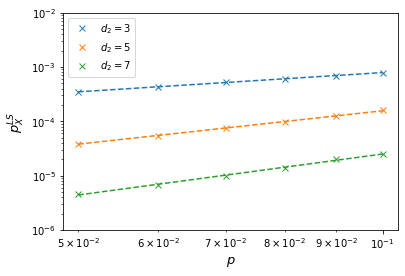

In [138]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
data2 = data2.iloc[:,4:]
code_distance_list = data2.index
p_list = data2.columns
a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

p_list = []
cm = plt.get_cmap("tab10")
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        print("d2=", str(2*i+3))
        print("katamuki=", clf.coef_)
        print("seppen=", clf.intercept_)
        #print(clf.predict([[-4]]))
        print("p(10^{-4})=", 10**clf.predict([[-4]]),"\n")
        print("p(5*10^{-4})=", 10**clf.predict([[-4+np.log10(5)]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        print("d2=", str(2*i+3))
        clf.fit(X, Y)
        print("katamuki=", clf.coef_)
        print("seppen=", clf.intercept_)
        #print(clf.predict([[-4]]))
        print("p(10^{-4})=", 10**clf.predict([[-4]]),"\n")
        print("p(5*10^{-4})=", 10**clf.predict([[-4+np.log10(5)]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
#print(a,10**clf.predict(a.reshape(-1, 1)))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_X^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.000001, 0.01)
ax.legend()

[0.05456331] [0.04477759]
[0.01878442] [0.03935095]


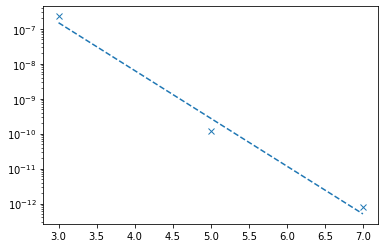

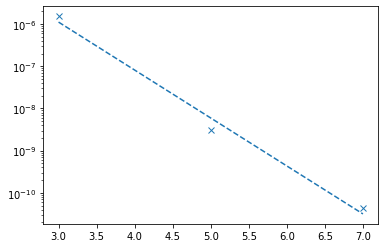

In [90]:
# p=10^{-4}
fig, ax = plt.subplots()
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([2.30756088e-07,1.17103802e-10,7.75089455e-13])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
ax.plot([3,5,7], [2.30756088e-07,1.17103802e-10,7.75089455e-13],marker='x',linewidth=0,color=cm(0))
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.set_yscale("log")

# p=5*10^{-4}
# p=10^{-4}
fig, ax = plt.subplots()
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([1.5357619e-06,3.13064516e-09,4.35239679e-11])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.plot([3,5,7], [1.5357619e-06,3.13064516e-09,4.35239679e-11],marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0,color=cm(0))
ax.set_yscale("log")

# p=5*10^{-4}

### Zエラー

$Z$エラーについては、直接サンプリングによって得られた結果を用いることにする。
→もっと精度を高めて計算すべきかも

In [164]:
# FUjii-labのパス
path = "/Users/konohideki/Documents/Fujii-lab/surface_realistic/realistic_single_round/SWAP/d1=3,N=1,eta=1000"
# ファイル名
file2 = "Z error,N=1,d2=(3,7,2),eta=1000,trials=400000,ver0re" + ".csv"
########################################

# csvファイルの読み込み
os.chdir(path)
data2 = pd.read_csv(file2, index_col=0)
# データフレームの行名(リスト)を取得
code_distance_list = data2.index
# データフレームの列名(リスト)を取得
p_list = data2.columns
##### グラフ作成 #####

a = np.array(p_list)
a = [float(num) for num in a]
a = np.array(a)

"""
fig, ax = plt.subplots()
for i in range(len(code_distance_list)):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{L(\rm{S})}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.legend()

fig, ax = plt.subplots()
for i in range(len(code_distance_list)-1):
    b = np.array(data2.loc[code_distance_list[i]])
    ax.plot(a, b,marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(10e-7, 1)
ax.legend()
"""

'\nfig, ax = plt.subplots()\nfor i in range(len(code_distance_list)):\n    b = np.array(data2.loc[code_distance_list[i]])\n    ax.plot(a, b,marker=\'v\',label=r"$d_{2}=$"+str(code_distance_list[i]))\nax.set_xlabel(r"$p$", fontsize=13)\nax.set_ylabel(r\'$p_Z^{L(\rm{S})}$\', fontsize=13)\nax.set_ylim(0,)\nax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) \nax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))\nax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) \nax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))\nax.set_xticks(a)\nax.legend()\n\nfig, ax = plt.subplots()\nfor i in range(len(code_distance_list)-1):\n    b = np.array(data2.loc[code_distance_list[i]])\n    ax.plot(a, b,marker=\'v\',label=r"$d_{2}=$"+str(code_distance_list[i]))\nax.set_xlabel(r"$p$", fontsize=13)\nax.set_ylabel(r\'$p_Z^{LS}$\', fontsize=13)\nax.set_ylim(0,)\nax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) \nax.ticklabel_format(style="

hokan= [0.00149154] 

hokan= [7.79812862e-05] 

hokan= [4.1856083e-06] 

[0.0001 0.0002 0.0003 0.0004 0.0005 0.0006 0.0007 0.0008 0.0009 0.001 ] [1.49525682e+09 1.49650994e+09 1.49776411e+09 1.49901934e+09
 1.50027561e+09 1.50153294e+09 1.50279133e+09 1.50405076e+09
 1.50531126e+09 1.50657281e+09]


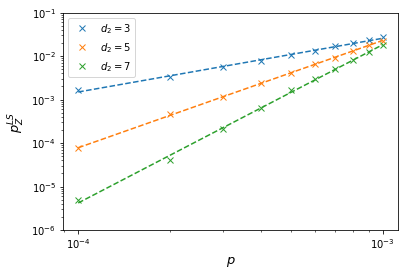

In [166]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

p_list = []
cm = plt.get_cmap("tab10")
fig, ax = plt.subplots()
for i in range(len(code_distance_list)-1):
    if i != 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        #print("katamuki=", clf.coef_)
        #print("seppen=", clf.intercept_)
        #print(clf.predict([[-4]]))
        print("hokan=", 10**clf.predict([[-4]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
    if i == 2:
        b = np.array(data2.loc[code_distance_list[i]])
        X = np.log10(a).reshape(-1, 1)
        Y = np.log10(b)
        clf.fit(X, Y)
        #print("katamuki=", clf.coef_)
        #print("seppen=", clf.intercept_)
        #print(clf.predict([[-4]]))
        print("hokan=", 10**clf.predict([[-4]]),"\n")
        p_list.append(10**clf.predict([[-4]]))
        ax.plot(a, b,marker='x',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0)
        ax.plot(a, 10**clf.predict(np.log10(a).reshape(-1, 1)),marker='',color=cm(i),linestyle="dashed")
print(a,10**clf.predict(a.reshape(-1, 1)))
ax.set_xlabel(r"$p$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_ylim(0,)
ax.xaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="x",scilimits=(0,0))
ax.yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
ax.ticklabel_format(style="sci",  axis="y",scilimits=(0,0))
ax.set_xticks(a)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(0.000001, 0.1)
ax.legend()

[0.00180831] [0.50234795]
[0.00025285] [0.06708755]


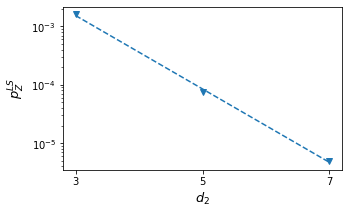

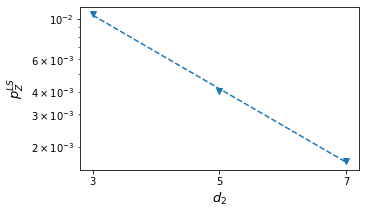

In [163]:
# p=10^{-4}
fig, ax = plt.subplots(figsize=(5, 3))
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([data2.iloc[0,0],data2.iloc[1,0],data2.iloc[2,0]])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
ax.set_xlabel(r"$d_2$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_xticks([3,5,7])
ax.plot([3,5,7], [data2.iloc[0,0],data2.iloc[1,0],data2.iloc[2,0]],marker='v',linewidth=0,color=cm(0))
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.set_yscale("log")

# p=5*10^{-4}
# p=10^{-4}
fig, ax = plt.subplots(figsize=(5, 3))
# fitting
clf = linear_model.LinearRegression()
X = np.array([3,5,7]).reshape(-1, 1)
Y = np.log10([data2.iloc[0,4],data2.iloc[1,4],data2.iloc[2,4]])
clf.fit(X, Y)
predict_p = clf.predict([[3],[7]]) 
# モデルの決定
a = clf.coef_
p_th = 10**(-4) / 10**(2*a)
b = clf.intercept_
C = 10**(b-a)
print(p_th, C)
ax.set_xlabel(r"$d_2$", fontsize=13)
ax.set_ylabel(r'$p_Z^{LS}$', fontsize=13)
ax.set_xticks([3,5,7])
ax.plot([3,7],10**predict_p,marker='',linestyle="dashed",color=cm(0))
ax.plot([3,5,7], [data2.iloc[0,4],data2.iloc[1,4],data2.iloc[2,4]],marker='v',label=r"$d_{2}=$"+str(code_distance_list[i]),linewidth=0,color=cm(0))
ax.set_yscale("log")

寿命の計算

In [ ]:
fig, ax = plt.subplots()
code_distance_list = np.array([3,5,7,9,11,13])
cm = plt.get_cmap("tab10")
print(pL_X_3(0.0001,code_distance_list)[0])
print(pL_Z_3(0.0001,code_distance_list))
ax.plot(code_distance_list, (4*3+6)*code_distance_list /pL_X_3(0.0001,code_distance_list)[0],marker='x',label=r"$\tau^{L(\rm{S})}/p_{X}^{L(\rm{S})}\tau$")
ax.plot(code_distance_list, (4*3+6)*code_distance_list /pL_Z_3(0.0001,code_distance_list),marker='v',label=r"$\tau^{L(\rm{S})}/p_{Z}^{L(\rm{S})}\tau$")
for i in range(len(code_distance_list)-1):
    plt.hlines([(4*3+6)*code_distance_list[i] /pL_X_3(0.0001,code_distance_list[i])[0]], 0, 12, "k", linestyles='dashed',linewidth=0.5)
    plt.hlines([(4*3+6)*code_distance_list[i] /pL_Z_3(0.0001,code_distance_list[i])[0]], 0, 12, "k", linestyles='dashed',linewidth=0.5)
ax.set_xlabel(r"$d_2^X, d_2^Z$", fontsize=13)
ax.set_ylabel(r'$\tau^{LS}/p_{X}^{LS}\tau, \tau^{LS}/p_{Z}^{LS}\tau$', fontsize=13)
ax.set_xticks(code_distance_list)
ax.set_yscale("log")
ax.set_xlim(2.6, 11.4)
ax.legend()
plt.show()